In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

def random_forest_model(csv_file, target_column, scale=False):
    
    # Cargar el archivo CSV
    data = pd.read_csv(csv_file, sep=',')
    
    # Ver las primeras filas (opcional)
    print(data.head())
    
    # Separar las variables predictoras (X) y la variable objetivo (y)
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    
    # Guardar los nombres de las columnas
    column_names = X.columns
    
    # Normalización (si se necesita)
    if scale:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
    
    # Separación en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Inicialización y entrenamiento del modelo Random Forest
    model = RandomForestClassifier(n_estimators=200, random_state=42)
    model.fit(X_train, y_train)
    
    # Predicciones
    y_pred = model.predict(X_test)
    
    # Evaluación del modelo
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()
    
    # Importancia de las características
    importances = model.feature_importances_
    
    # Si los datos fueron escalados, usamos los nombres de las columnas originales
    if scale:
        # Crear un DataFrame con las importancias y las columnas correspondientes
        importances_df = pd.DataFrame({
            'Feature': column_names,
            'Importance': importances
        })
        # Ordenar las características por su importancia
        importances_df = importances_df.sort_values(by='Importance', ascending=False)
        plt.figure(figsize=(10,6))
        sns.barplot(x='Importance', y='Feature', data=importances_df)
        plt.title('Importancia de las Características')
        plt.show()
    
    else:
        # Si no se normalizó, podemos acceder a las columnas directamente
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(10,6))
        sns.barplot(x=importances[indices], y=column_names[indices])
        plt.title('Importancia de las Características')
        plt.show()
    
    # Devolver las métricas de evaluación como diccionario
    metrics = {
        "classification_report": classification_report(y_test, y_pred),
        "confusion_matrix": cm
    }
    
    return metrics


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

c:\Users\julio\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\julio\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\julio\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

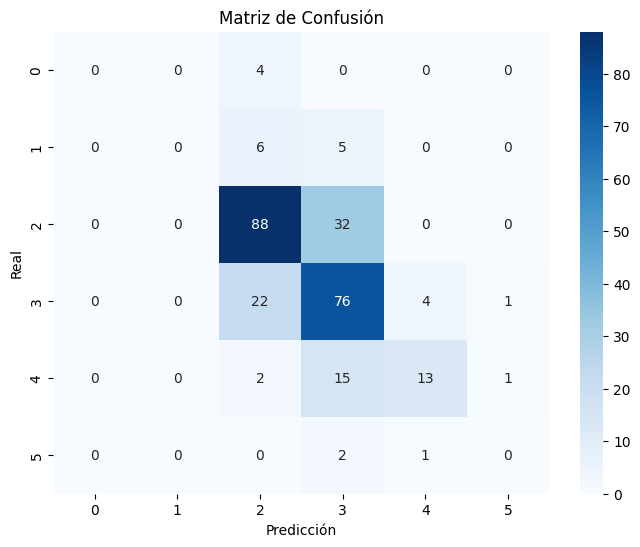

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 1000x600 with 0 Axes>

In [4]:
metrics = random_forest_model("../cleanDatasets/winequality-red_cleaned.csv", target_column="quality", scale=True)

metrics = random_forest_model("../cleanDatasets/winequality-white_cleaned.csv", target_column="quality", scale=True)